# Multiple Disease Prediction

## KIDNEY DISEASE

In [50]:
import pandas as pd
import numpy as np

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Loading Data
kidney_data = pd.read_csv('kidney_disease.csv')
kidney_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [53]:
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [54]:
kidney_data.shape

(400, 26)

## Data Preprocessing

In [55]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [56]:
# Check for missing values
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [57]:
#Rows with any missing value	
kidney_data[kidney_data.isnull().any(axis=1)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,...,43,9600,4.5,no,no,no,good,no,no,notckd
363,363,67.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44,5900,5.2,no,no,no,good,no,no,notckd
365,365,24.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,10700,6.3,no,no,no,good,no,no,notckd
378,378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,42,7700,5.5,no,no,no,good,no,no,notckd


In [58]:
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [59]:
kidney_data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [60]:
kidney_data.replace('?', np.nan, inplace=True)

In [61]:
# Separate numerical and categorical columns
num_cols = kidney_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = kidney_data.select_dtypes(include=['object']).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Numerical columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')
Categorical columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [62]:
# Impute Numerical Columns (Median recommended) -Median is preferred when outliers may exist (very common in medical datasets)

# Fill missing values in numerical columns with median
for col in num_cols:
    kidney_data[col].fillna(kidney_data[col].median(), inplace=True)


In [63]:
# Impute Categorical Columns (Mode)

# Fill missing values in categorical columns with mode
for col in cat_cols:
    kidney_data[col].fillna(kidney_data[col].mode()[0], inplace=True)


In [64]:
kidney_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [65]:
#checking for duplicte values
kidney_data.duplicated().value_counts()

False    400
Name: count, dtype: int64

In [66]:
kidney_data['pcv']=kidney_data['pcv'].astype('int')
kidney_data['wc']=kidney_data['wc'].astype('int')
kidney_data['rc']=kidney_data['rc'].astype('float')
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

## EDA (Exploratory Data Analysis)

In [67]:
# distribution of TARGET Variable

kidney_data['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [68]:
kidney_data.classification = kidney_data.classification.replace("ckd\t","ckd")

In [69]:
kidney_data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [70]:
kidney_data['classification'] = kidney_data['classification'].replace(['ckd','notckd'], [1,0])

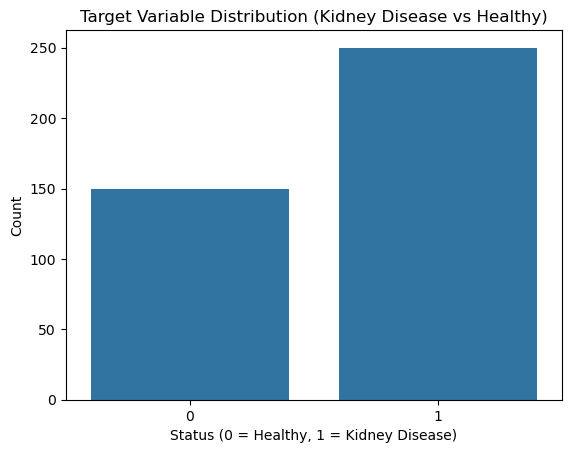

In [71]:
# Target variable distribution (status)

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure()
sns.countplot(x ='classification', data=kidney_data)
plt.title("Target Variable Distribution (Kidney Disease vs Healthy)")
plt.xlabel("Status (0 = Healthy, 1 = Kidney Disease)")
plt.ylabel("Count")
plt.show()

In [72]:
# dropping id column
kidney_data.drop('id', axis = 1, inplace = True)

In [73]:
kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [74]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [75]:
kidney_data.select_dtypes(['object'])

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [76]:
dictonary = {
    "rbc":{
        "normal":0,
        "abnormal":1,
    },
    "pc":{
        "normal":0,
        "abnormal":1,
    },
    "pcc":{
        "present":1,
        "notpresent":0,
    },
    "ba":{
        "notpresent":0,
        "present":1,
    },
    "htn":{
        "yes":1,
        "no":0,
    },
    "dm":{
        "yes":1,
        "no":0,
    },
    "cad":{
        "yes":1,
        "no":0,
    },
    "appet":{
        "good":1,
        "poor":0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [77]:
kidney_data=kidney_data.replace(dictonary)

In [78]:
kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,38,6000,5.2,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31,7500,5.2,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


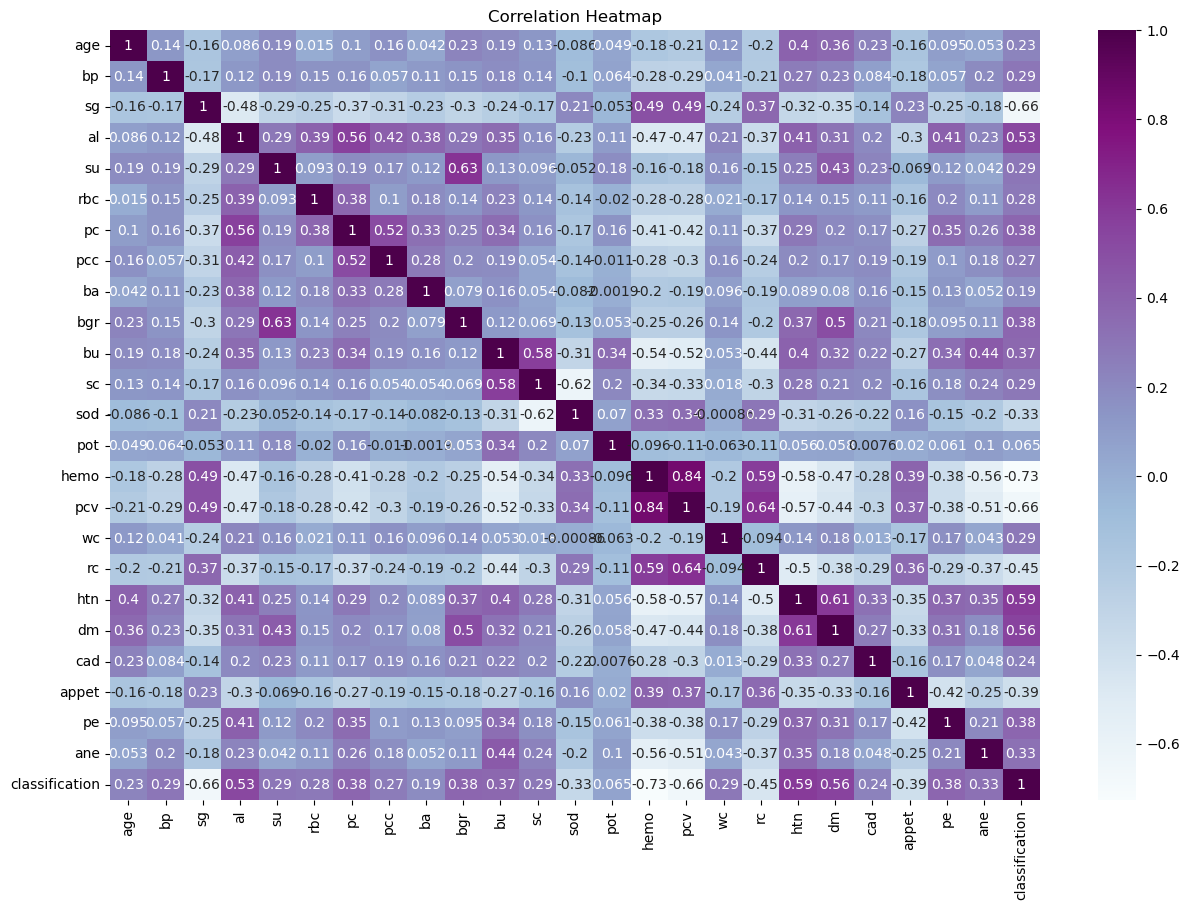

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(kidney_data.corr(), annot=True, cmap='BuPu')
plt.title("Correlation Heatmap")
plt.show()

## Feature & Target

In [80]:
# sc, bu, sg, al, bgr, hemo,
# pcv, rc, wc, rbc, pc,
# htn, dm

x = kidney_data.drop(['classification','al','su','pcc','ba', 'appet','bu','pot','sod', 'cad', 'pe','ane'], axis = 1)
y = kidney_data['classification']

In [81]:
x.columns

Index(['age', 'bp', 'sg', 'rbc', 'pc', 'bgr', 'sc', 'hemo', 'pcv', 'wc', 'rc',
       'htn', 'dm'],
      dtype='object')

## Train-test split

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scaling

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [84]:
# List all numeric features
numeric_features = x.columns.tolist()

In [85]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

## Model Training

In [86]:
!pip install xgboost -q

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Logistic Regression

In [88]:
# Logistic Regression pipeline

logreg_pipeline = Pipeline([
    ('preprocess', preprocessor), 
    ('model', LogisticRegression(max_iter=1000))
])

# Fit
logreg_pipeline.fit(x_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(x_test)


# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Logistic Regression---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))


---Logistic Regression---
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## K-Nearest Neighbors

In [89]:
# K-Nearest Neighbors pipeline

knn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Fit
knn_pipeline.fit(x_train, y_train)

# Predict
y_pred_knn = knn_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---K-Nearest Neighbors (KNN)---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print(classification_report(y_test, y_pred_knn))


---K-Nearest Neighbors (KNN)---
Accuracy: 0.9875
F1 Score: 0.9875489695111564
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



##  Decision Tree

In [90]:
# Decision Tree pipeline

dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Fit
dt_pipeline.fit(x_train, y_train)

# Predict
y_pred_dt = dt_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Decision Tree---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))


---Decision Tree---
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Random Forest

In [91]:
# Random Forest pipeline

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Fit
rf_pipeline.fit(x_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(x_test)


# Evaluate
print("---Random Forest---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))


---Random Forest---
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



##  Gradient Boosting

In [92]:
# Gradient Boosting pipeline

gb_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', GradientBoostingClassifier(n_estimators=200, random_state=42))
])

# Fit
gb_pipeline.fit(x_train, y_train)

# Predict
y_pred_gb = gb_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Gradient Boosting---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))


---Gradient Boosting---
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## XGBoost

In [93]:
# XGBoost pipeline

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(random_state=42))
])

# Fit
xgb_pipeline.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(x_test)

# Evaluate
print("---XGBoost---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print(classification_report(y_test, y_pred_xgb))

---XGBoost---
Accuracy: 0.9875
F1 Score: 0.9875489695111564
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## Model Evaluation & Validation

In [94]:
from sklearn.model_selection import cross_val_score
import numpy as np

pipelines = {
    "Logistic Regression": logreg_pipeline,
    "KNeighborsClassifier": knn_pipeline,
    "DecisionTreeClassifier":dt_pipeline,
    "Random Forest": rf_pipeline,
    "GradientBoostingClassifier": gb_pipeline,
    "XGBoost": xgb_pipeline
    
}

# Store evaluation metrics
model_scores = {}

for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, x, y, cv=5, scoring='f1')
    model_scores[name] = np.mean(scores)

print(model_scores)


{'Logistic Regression': np.float64(0.9818873555979808), 'KNeighborsClassifier': np.float64(0.9664294358994819), 'DecisionTreeClassifier': np.float64(0.9757942309694887), 'Random Forest': np.float64(0.9860089922514422), 'GradientBoostingClassifier': np.float64(0.9816282394718776), 'XGBoost': np.float64(0.982205857634429)}


In [95]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": list(model_scores.keys()),
    "F1 Score": list(model_scores.values())
})

comparison_df = comparison_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print(comparison_df)


                        Model  F1 Score
0               Random Forest  0.986009
1                     XGBoost  0.982206
2         Logistic Regression  0.981887
3  GradientBoostingClassifier  0.981628
4      DecisionTreeClassifier  0.975794
5        KNeighborsClassifier  0.966429


In [96]:
best_model_name = comparison_df.loc[0, 'Model']
best_pipeline = pipelines[best_model_name]
best_score = comparison_df.loc[0, 'F1 Score']

print("Best Model:", best_model_name)
print("Best F1 Score:", best_score)


Best Model: Random Forest
Best F1 Score: 0.9860089922514422


Random Forest ROC-AUC Score: 1.0


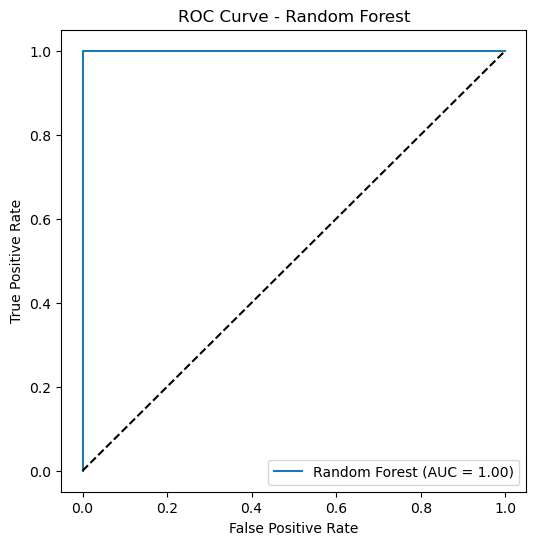

In [97]:
# ROC-AUC comparison

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_rf = rf_pipeline.predict_proba(x_test)[:, 1]  # probability for positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("Random Forest ROC-AUC Score:", roc_auc)

#plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix

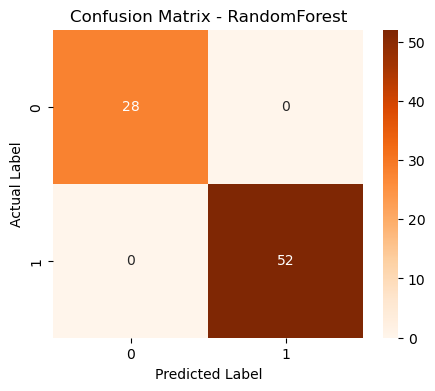

In [98]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_rf = rf_pipeline.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - RandomForest")
plt.show()


## Pickle file

In [99]:
import pickle

# Save the pipeline
with open("rf_pipeline.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)

print("Random Forest pipeline saved successfully!")

Random Forest pipeline saved successfully!
